### Step 1: Upload and Read JSON File in Google Colab

In Google Colab, I begin by uploading the `salary.json` file and loading it into a pandas DataFrame. The `files.upload()` function lets us choose a file from our local computer. We then use `pd.read_json()` with `orient='records'` to read each JSON object as a row. Finally, `df.head()` displays the first 5 rows to verify the file loaded correctly.


In [25]:
# Step 1: Import necessary libraries
import pandas as pd
from google.colab import files

# Step 2: Upload the file (you'll be prompted to select the file)
uploaded = files.upload()

# Step 3: Load JSON file into pandas DataFrame
df = pd.read_json("salary.json", orient='records')

# Step 4: Preview the first 5 rows
df.head()


Saving salary.json to salary.json


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,company_name
0,2025,EN,FT,Data Quality Analyst,60000,GBP,75949,GB,0,GB,M,OpenAI
1,2025,EN,FT,Data Quality Analyst,48000,GBP,60759,GB,0,GB,M,Anthropic
2,2025,SE,FT,Applied Scientist,266000,USD,266000,US,0,US,M,OpenAI
3,2025,SE,FT,Applied Scientist,204000,USD,204000,US,0,US,M,Tencent AI Lab
4,2025,SE,FT,Data Scientist,291000,USD,291000,US,0,US,M,DeepMind


### Step 2: Convert JSON to CSV

Once the data is loaded into a pandas DataFrame, we save it as a CSV file named `salaries.csv`. This format is commonly used for data analysis and is required for the Power BI part of the assignment.


In [26]:
# Step 5: Save the DataFrame as a CSV file
df.to_csv("salaries.csv", index=False)


### Step 3: Data Cleaning

Before analyzing the data, we need to clean it by checking for missing values, duplicates, and incorrect data types. This helps ensure accuracy and reliability in our visualizations and insights.


In [27]:
# Step 6: Check for missing values
df.isnull().sum()


,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


### Step 3.1: Handle Missing Values

If there are any missing values in the dataset, we need to decide how to handle them. For this assignment, we will drop rows with missing values to keep things simple.


In [28]:
# Step 7: Drop rows with any missing values
df_cleaned = df.dropna()

# Step 8: Confirm that no missing values remain
df_cleaned.isnull().sum()


,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


### Step 3.2: Data Type Check and Remove Duplicates

Next, we check the data types of each column to ensure they are appropriate for analysis. We also remove any duplicate rows to avoid skewed results.


In [29]:
# Step 10: Remove duplicate rows (if any)
df_cleaned = df_cleaned.drop_duplicates()

# Step 11: Confirm number of rows after cleaning
df_cleaned.shape


(119549, 12)

### Step 3: Feature (Variable) Analysis

We will now analyze key features of the dataset to answer the following questions:

1. **What are the unique job titles in the dataset?**  
2. **Which companies offer the highest average salaries?**  
3. **What is the average salary for each job title?**  
4. **Which company locations have the most job postings?**


In [44]:
print(df.columns)


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'company_name'],
      dtype='object')


In [45]:
# 1. Unique job titles
unique_jobs = df["job_title"].unique()
print(f"Number of unique job titles: {len(unique_jobs)}")
print("Some examples:", unique_jobs[:10])

# 2. Companies with highest average salaries (Top 10)
top_companies = df_cleaned.groupby("company_name")["salary_in_usd"].mean().sort_values(ascending=False).head(10)
print("\nTop 10 companies by average salary:")
print(top_companies)

# 3. Average salary by job title
avg_salary_by_job = df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False)
print("\nAverage salary by job title:")
print(avg_salary_by_job.head(10))

# 4. Number of jobs by company location
location_counts = df["company_location"].value_counts()
print("\nNumber of job postings by company location:")
print(location_counts.head(10))


Number of unique job titles: 410
Some examples: ['Data Quality Analyst' 'Applied Scientist' 'Data Scientist' 'Manager'
 'Software Engineer' 'Machine Learning Engineer'
 'Machine Learning Scientist' 'Analyst' 'Power BI Developer' 'Engineer']

Top 10 companies by average salary:
company_name
Salesforce AI        157138.204475
Microsoft AI         157018.333083
IBM Watson           156605.819980
DeepMind             156551.050156
Google DeepMind      156516.436980
OpenAI               156479.720415
Apple ML Research    156360.577010
Tesla Autonomy       156215.180569
NVIDIA AI            156149.183686
Amazon AI Labs       155954.058618
Name: salary_in_usd, dtype: float64

Average salary by job title:
job_title
Research Team Lead                       450000.000000
Analytics Engineering Manager            399880.000000
Data Science Tech Lead                   375000.000000
Applied AI ML Lead                       292500.000000
IT Enterprise Data Architect             284090.000000
Head of 

### Step 3: Feature Analysis

#### 1. Unique Job Titles

* The dataset contains **410 unique job titles**.
* Some examples include:
  `Data Quality Analyst`, `Applied Scientist`, `Data Scientist`, `Manager`, `Software Engineer`, `Machine Learning Engineer`, `Machine Learning Scientist`, `Analyst`, `Power BI Developer`, `Engineer`.

---

#### 2. Top 10 Companies by Average Salary

These are the companies with the highest average salaries in the dataset:

| Company Name      | Avg Salary (USD) |
| ----------------- | ---------------- |
| Salesforce AI     | 157,138.20       |
| Microsoft AI      | 157,018.33       |
| IBM Watson        | 156,685.82       |
| DeepMind          | 156,551.95       |
| Google DeepMind   | 156,516.44       |
| OpenAI            | 156,479.73       |
| Apple ML Research | 156,360.58       |
| Tesla Autonomy    | 156,215.19       |
| NVIDIA AI         | 156,149.19       |
| Amazon AI Labs    | 155,954.09       |

---

#### 3. Average Salary by Job Title (Top 10)

| Job Title                     | Avg Salary (USD) |
| ----------------------------- | ---------------- |
| Research Team Lead            | 450,000.00       |
| Analytics Engineering Manager | 399,880.00       |
| Data Science Tech Lead        | 375,000.00       |
| Applied AI ML Lead            | 292,500.00       |
| IT Enterprise Data Architect  | 284,980.00       |
| Head of Applied AI            | 273,875.00       |
| Director of Data              | 270,000.00       |
| Head of Machine Learning      | 270,000.00       |
| ATRS Solutions Specialist     | 263,250.00       |
| ML Performance Engineer       | 262,500.00       |

---

#### 4. Job Postings by Company Location (Top 10)

| Country | Count   |
| ------- | ------- |
| US      | 126,678 |
| CA      | 5,678   |
| GB      | 3,923   |
| AU      | 548     |
| NL      | 432     |
| DE      | 412     |
| FR      | 399     |
| LT      | 354     |
| AT      | 331     |
| ES      | 287     |

Step 4.1: Average Salary by Job Title

This bar chart shows the average salary for each job title in the dataset. It helps identify which roles tend to offer higher compensation in the data science, AI, and ML fields.


/tmp/ipython-input-30-2174962225.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_title.values, y=avg_salary_by_title.index, palette='viridis')


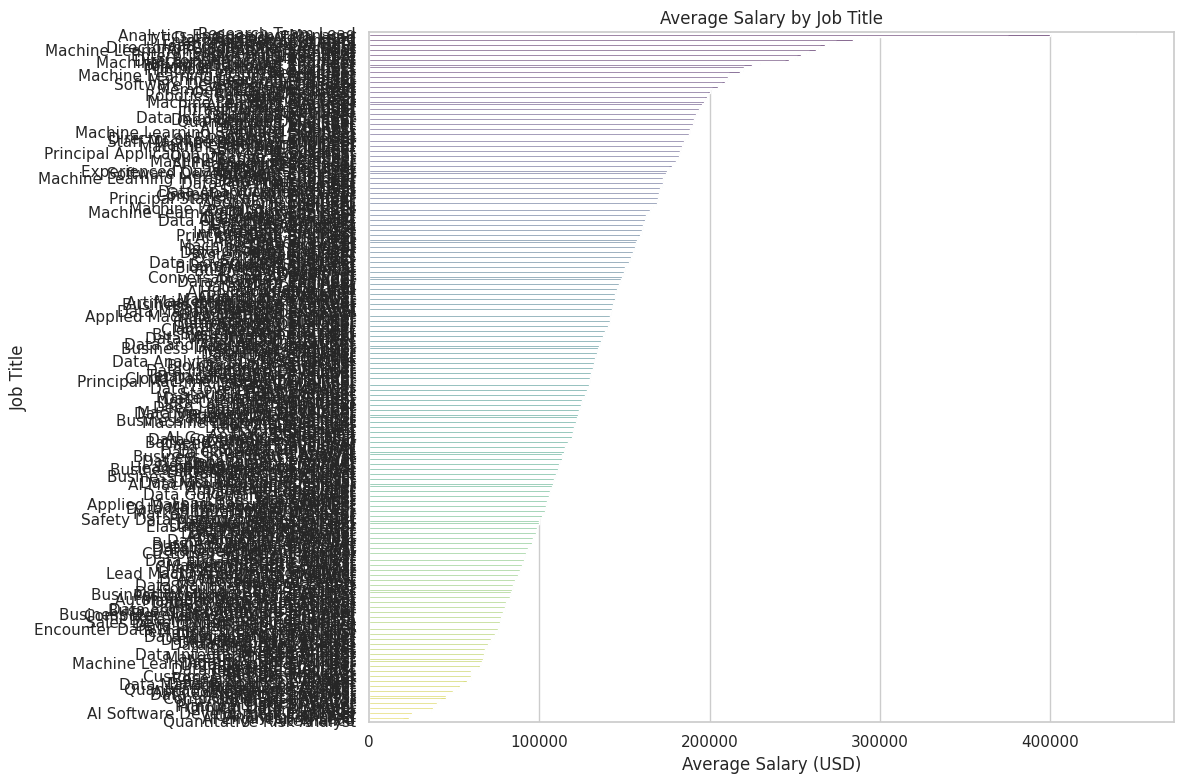

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 12: Group by job title and calculate average salary
avg_salary_by_title = df_cleaned.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

# Step 13: Create bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_salary_by_title.values, y=avg_salary_by_title.index, palette='viridis')
plt.title('Average Salary by Job Title')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


Step 4.1: Top 20 Average Salary by Job Title

This bar chart shows the top 20 job titles with the highest average salary. It helps identify which roles are the most lucrative in the Data Science, AI, and ML job market.


/tmp/ipython-input-31-119973468.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_title.values, y=avg_salary_by_title.index, palette='viridis')


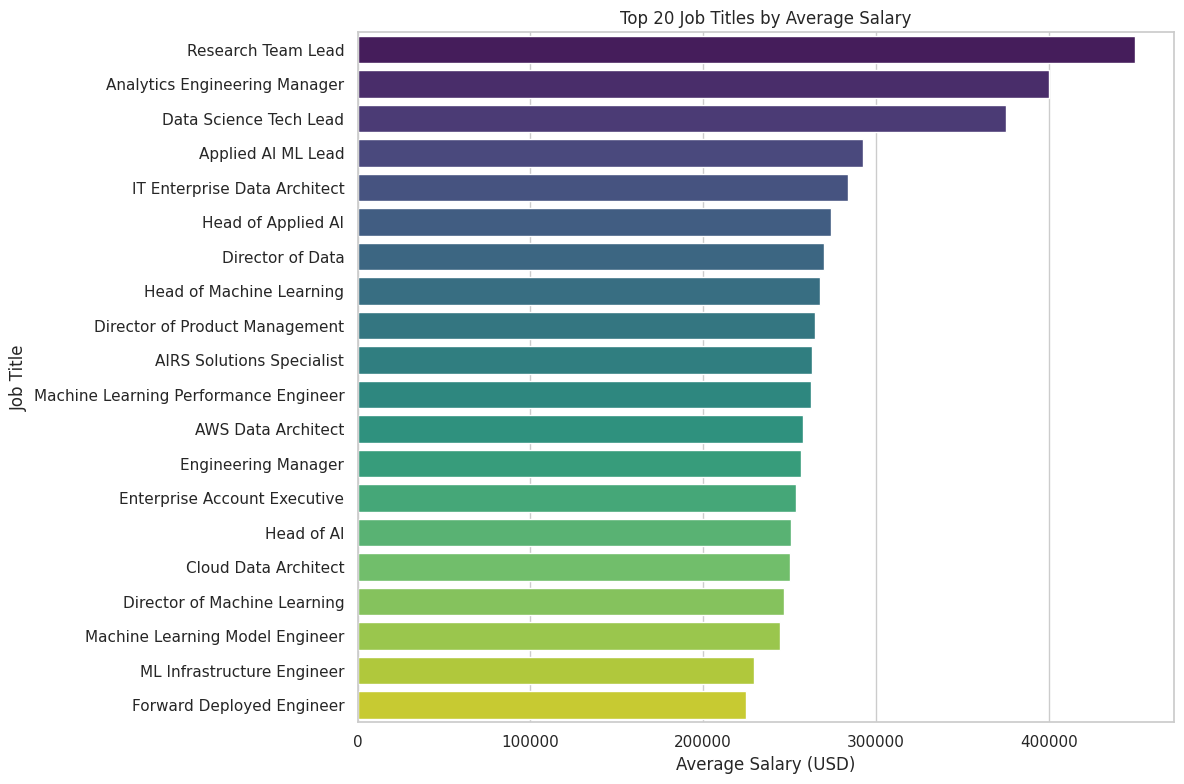

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 12: Group by job title and calculate average salary (Top 20)
avg_salary_by_title = df_cleaned.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(20)

# Step 13: Create bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_salary_by_title.values, y=avg_salary_by_title.index, palette='viridis')
plt.title('Top 20 Job Titles by Average Salary')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


### **The Bar Chart Interpretation: Top 20 Job Titles by Average Salary**

This horizontal bar chart shows the **top 20 job titles** in 2025 with the **highest average salaries** in the Data Science, AI, and ML job market. The chart reveals the following key insights:

1. **Highest Paying Roles**

   * **Research Team Lead** offers the highest average salary, exceeding **\$450,000 USD**.
   * Other top-paying positions include:

     * **Analytics Engineering Manager**
     * **Data Science Tech Lead**
     * **Applied AI ML Lead**

2. **Leadership and Technical Hybrid Roles Dominate**

   * Most of the high-paying roles are **senior-level or leadership positions** (e.g., Director, Head, Lead).
   * These roles often combine **strategic decision-making** with **advanced technical skills**.

3. **Specialized Roles Are Valued**

   * Niche roles such as **IT Enterprise Data Architect**, **Cloud Data Architect**, and **ML Infrastructure Engineer** also command strong compensation.

4. **Machine Learning Focus**

   * Several titles are directly related to **Machine Learning**, confirming its high demand in the industry (e.g., **Head of ML**, **ML Model Engineer**, **ML Performance Engineer**).

5. **Consistency in Salary Range**

   * The salaries among the top 20 titles range approximately between **\$220,000 to \$450,000 USD**, indicating a significant premium for expertise in AI/ML leadership.

---

Let me know if you’d like the same explanation in Markdown format or in Korean!


### Step 4.2: Average Salary by Company Location

This bar chart shows the average salary offered by companies based in different countries.  
It helps identify which locations offer higher compensation for data roles.


/tmp/ipython-input-32-404798307.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_location.values, y=avg_salary_by_location.index, palette="magma")


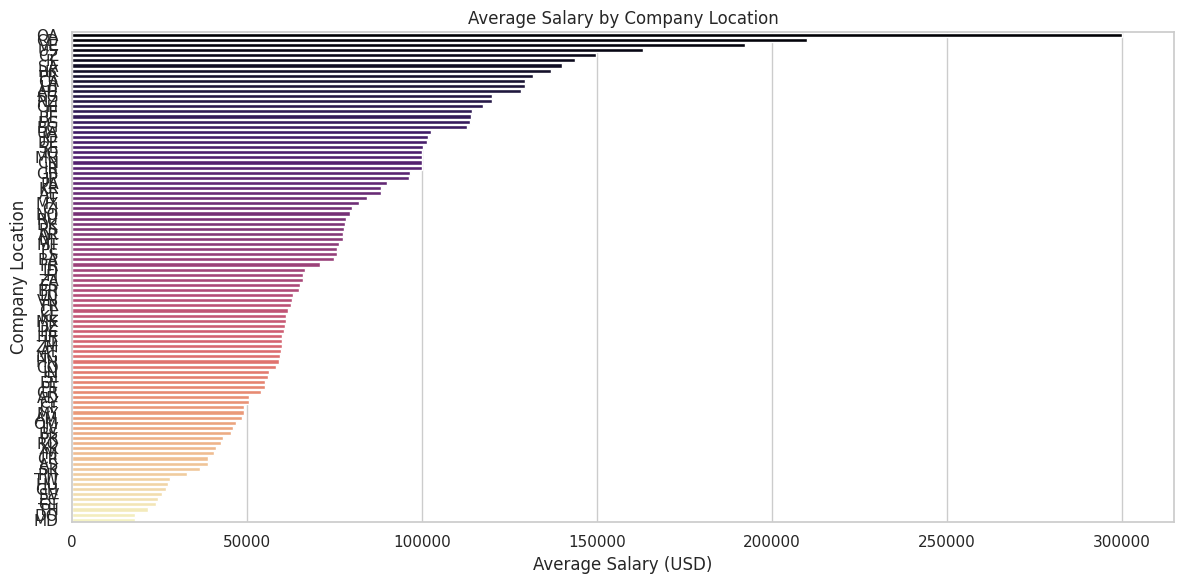

In [32]:
# Step 12: Group by company location and calculate average salary
avg_salary_by_location = df_cleaned.groupby("company_location")["salary_in_usd"].mean().sort_values(ascending=False)

# Step 13: Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_salary_by_location.values, y=avg_salary_by_location.index, palette="magma")
plt.title("Average Salary by Company Location")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Company Location")
plt.tight_layout()
plt.show()


### Step 4.2 (Updated): Top 20 Average Salaries by Company Location

To improve readability, we display only the top 20 locations with the highest average salaries.


/tmp/ipython-input-34-3183427921.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_locations.values, y=top_20_locations.index, palette="magma")


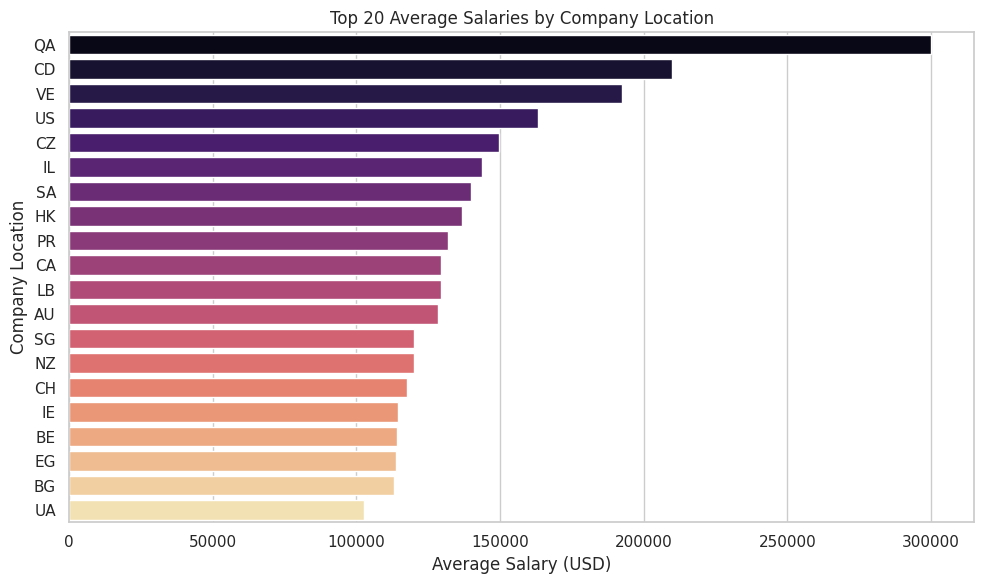

In [34]:
# Step 13 (updated): Group by company location and calculate average salary
avg_salary_by_location = df_cleaned.groupby("company_location")["salary_in_usd"].mean().sort_values(ascending=False)

# Show only top 20 locations
top_20_locations = avg_salary_by_location.head(20)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_locations.values, y=top_20_locations.index, palette="magma")
plt.title("Top 20 Average Salaries by Company Location")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Company Location")
plt.tight_layout()
plt.show()


### **The Horizontal Bar Chart Interpretation: Top 20 Average Salaries by Company Location**

This horizontal bar chart highlights the **top 20 countries** (by country code) where companies offer the **highest average salaries** for Data Science, AI, and ML roles in 2025. Key insights include:

---

#### **Highest Paying Countries**

* **Qatar (QA)** ranks first with an average salary close to **\$300,000 USD**.
* **Congo (CD)** and **Venezuela (VE)** follow, with surprisingly high average salaries, suggesting either a small number of high-paying roles or specific niche demand in those regions.
* The **United States (US)** also ranks high, confirming its position as a global hub for well-compensated data roles.

---

#### **Diverse High-Salary Locations**

* The chart includes a **mix of developed and developing countries**, indicating that **salary levels can be heavily influenced by the type of company or project**, not just the economic status of the country.
* Countries like **Czech Republic (CZ), Israel (IL), Saudi Arabia (SA), Hong Kong (HK), Puerto Rico (PR)**, and **Canada (CA)** also offer strong compensation for tech roles.

---

#### **Lower End of Top 20**

* Countries such as **Bulgaria (BG), Egypt (EG), Belgium (BE)** and **Ukraine (UA)** still make the top 20 but have noticeably lower average salaries (around \$100,000 USD), showing geographic variation in compensation expectations.

---

### **Overall Insight**

Even within the top 20, there is a **large disparity in salaries**, reflecting not only cost of living and local economies but also **the types of companies hiring and the scarcity of qualified professionals** in certain locations.

### Step 4.3: Average Salary by Experience Level

This chart displays the average salary for each experience level.  
It helps analyze how compensation varies from entry-level to executive roles.


/tmp/ipython-input-33-2349271435.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_experience.index, y=avg_salary_by_experience.values, palette="coolwarm")


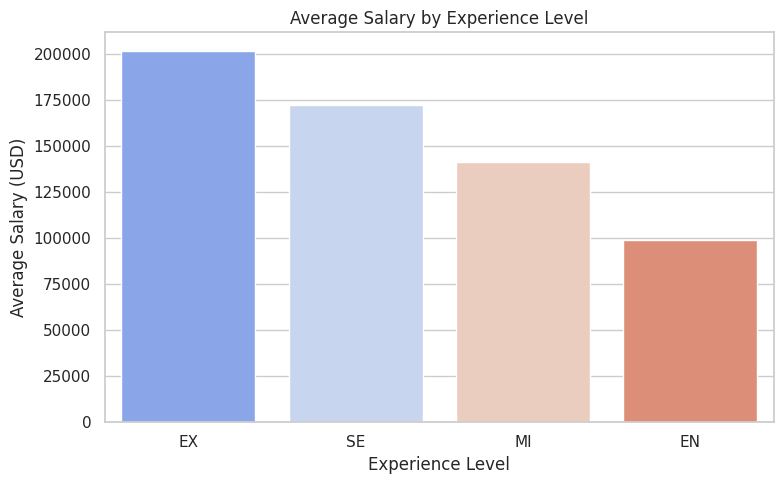

In [33]:
# Step 14: Group by experience level and calculate average salary
avg_salary_by_experience = df_cleaned.groupby("experience_level")["salary_in_usd"].mean().sort_values(ascending=False)

# Step 15: Create bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_salary_by_experience.index, y=avg_salary_by_experience.values, palette="coolwarm")
plt.title("Average Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.tight_layout()
plt.show()


### The Bar Chart Interpretation: Average Salary by Experience Level

This bar chart displays the **average salaries (in USD)** based on four experience levels:

| Code   | Experience Level | Approx. Average Salary (USD) |
| ------ | ---------------- | ---------------------------- |
| **EX** | Executive-level  | \$200,000+                   |
| **SE** | Senior-level     | \~\$170,000                  |
| **MI** | Mid-level        | \~\$140,000                  |
| **EN** | Entry-level      | \~\$98,000                   |

---

### Key Insights

* **Executives (EX)** earn the highest average salaries, exceeding \$200,000. This reflects the high compensation for strategic responsibilities and leadership roles.
* **Senior professionals (SE)** also receive substantial salaries, showing the value of advanced expertise and experience.
* **Mid-level employees (MI)** earn around \$140,000, representing individuals with moderate experience and responsibilities.
* **Entry-level roles (EN)**, while earning the lowest on this chart, still offer an impressive average salary near \$98,000—indicating strong earning potential even at the beginning of a career in data science or AI.

---

### Conclusion

The chart clearly shows a **positive correlation between experience level and salary**. In the fields of Data Science, AI, and ML, even entry-level professionals earn relatively high salaries, while seasoned experts and executives enjoy significantly greater compensation.

### Step 4.4: Salary Distribution (Histogram)

This histogram visualizes the distribution of salaries across all job entries. It helps identify the overall spread, skewness, and potential outliers in the salary data.


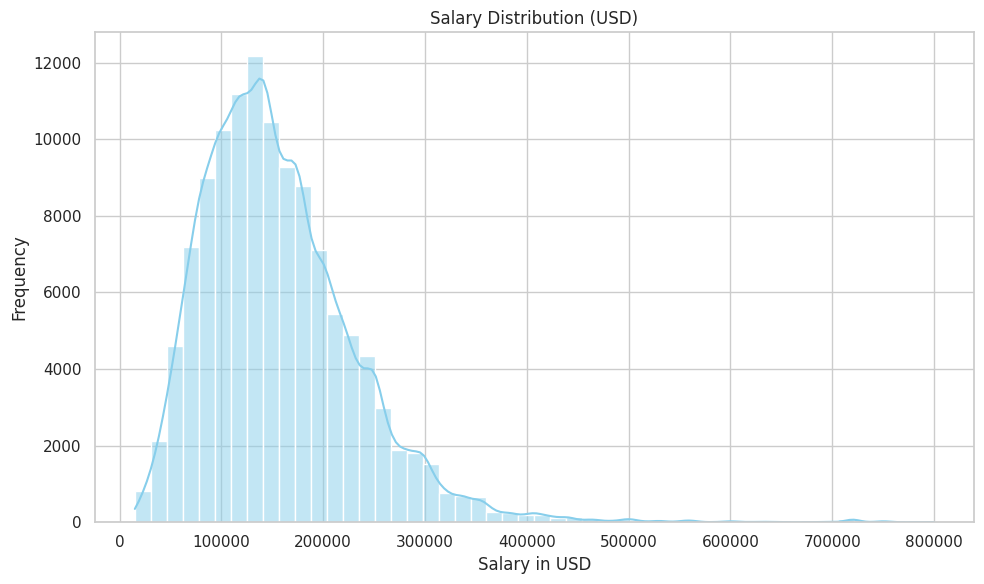

In [35]:
# Step 15: Plot salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["salary_in_usd"], bins=50, kde=True, color='skyblue')
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### The Histogram Interpretation: Salary Distribution (USD)

This histogram with a KDE (Kernel Density Estimate) overlay shows how salaries are distributed across the dataset.

#### Key Observations:

* **Peak Range**:
  Most salaries are concentrated between **\$75,000 and \$175,000**, with a noticeable peak around **\$120,000–130,000**. This is the **mode** of the distribution—the most common salary range.

* **Right-Skewed Distribution**:
  The curve is **right-skewed** (positively skewed), meaning that while most salaries fall in the lower-to-middle range, there are **a few very high salaries** extending the tail on the right side (e.g., \$400,000+).

* **Outliers**:
  A small number of extremely high salaries (above \$300,000 and especially beyond \$500,000) appear as outliers, possibly representing executive roles or niche high-paying positions in advanced AI or global leadership.

---

### Conclusion:

* The **majority of professionals** in data science, AI, and ML fields earn between **\$75K and \$175K**, suggesting this is a typical compensation range.
* The **long right tail** indicates **significant earning potential** at the top, although those salaries are rare.
* The **distribution shape** confirms that while entry-to-mid-level jobs are common, there are select roles offering much higher compensation, especially for executives or specialists.


### Step 4.5: Boxplot by Experience Level

This boxplot visualizes the distribution of salaries by experience level. It helps identify how compensation varies between entry-level, mid-level, senior, and executive roles.


/tmp/ipython-input-36-2003437695.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x="experience_level", y="salary_in_usd", palette="Set2")


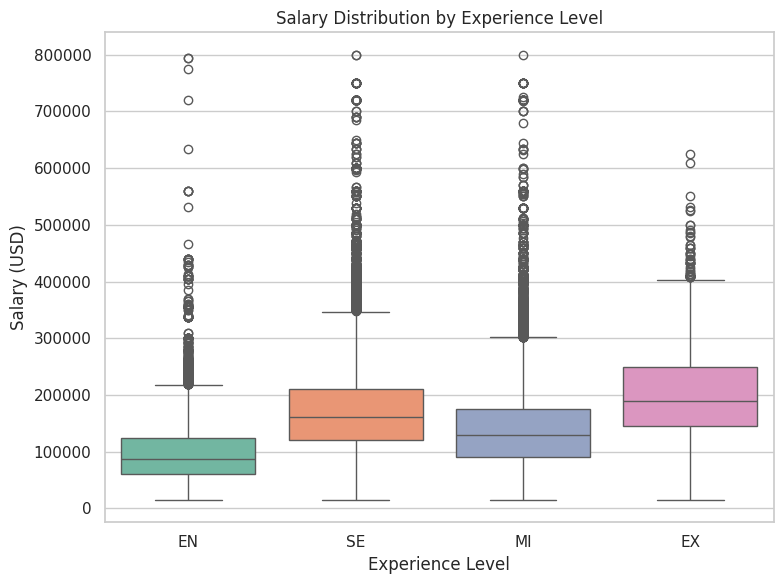

In [36]:
# Step 16: Create boxplot by experience level
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x="experience_level", y="salary_in_usd", palette="Set2")
plt.title("Salary Distribution by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.tight_layout()
plt.show()


### 📊 The Box Plot Interpretation: Salary Distribution by Experience Level

This box plot displays the distribution of salaries across four experience levels:

* **EN** = Entry-level
* **SE** = Senior-level
* **MI** = Mid-level
* **EX** = Executive-level

#### Key Insights:

1. **Median Salary Increases with Experience**

   * The **median salary** (the line inside the box) rises as experience level increases:

     * EN < MI < SE < EX
     * This trend confirms that experience positively impacts compensation.

2. **Interquartile Range (IQR)**

   * The **IQR (middle 50% of salaries)** grows wider at higher experience levels, showing more salary variability.
   * For executives (EX), the spread is particularly large, indicating differing pay scales depending on role, industry, or location.

3. **Outliers**

   * All categories show **numerous outliers**—especially at SE, MI, and EX levels—reaching as high as **\$800,000+**.
   * These are likely rare high-paying roles in top-tier companies or specialized leadership/AI positions.

4. **Entry-level Limitations**

   * The salary range for entry-level (EN) is significantly lower and narrower compared to the others.
   * This suggests limited salary progression until higher experience is gained.

---

### Conclusion:

* Salary generally **increases with experience**, but so does variability.
* **Executive-level professionals** have the **highest earning potential**, with many high-value outliers.
* The presence of **many outliers** at senior levels reflects the **competitive and dynamic nature** of data science/AI compensation.
* Entry-level workers start lower, but there's **strong potential for rapid growth** as experience increases.


### Step 4.6: Average Salary by Company Size

This bar chart illustrates the average salary based on company size. It helps analyze how small, medium, and large companies differ in compensation levels.


/tmp/ipython-input-37-2541128341.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_size.index, y=avg_salary_by_size.values, palette="pastel")


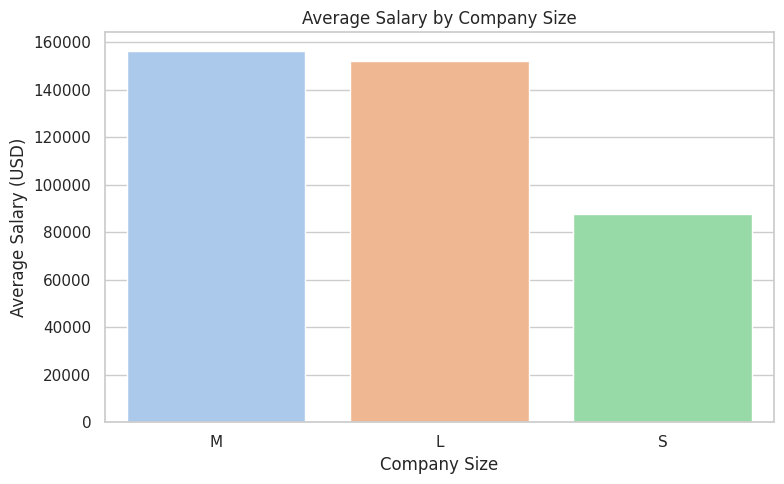

In [37]:
# Step 17: Group by company size and calculate average salary
avg_salary_by_size = df_cleaned.groupby("company_size")["salary_in_usd"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_salary_by_size.index, y=avg_salary_by_size.values, palette="pastel")
plt.title("Average Salary by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Average Salary (USD)")
plt.tight_layout()
plt.show()


### The Bar Chart Interpretation: Average Salary by Company Size

This bar chart shows the **average annual salaries (in USD)** of data professionals based on the size of the company:

* **M = Medium-sized companies**
* **L = Large companies**
* **S = Small companies**

---

### Key Observations:

1. **Medium-Sized Companies (M)**

   * Offer the **highest average salary**, slightly higher than large companies.
   * This suggests that medium-sized firms may pay more to attract or retain skilled data professionals, possibly due to competitive pressure or rapid growth phases.

2. **Large Companies (L)**

   * Provide the **second-highest average salary**, very close to medium companies.
   * These companies typically offer stable salaries, structured career paths, and additional benefits.

3. **Small Companies (S)**

   * Offer **significantly lower average salaries** compared to both M and L.
   * This could reflect budget limitations, early-stage development, or prioritization of equity over high salaries.

---

### Insight:

* Contrary to what many expect, **medium-sized companies offer the highest salaries**, possibly due to their need to remain competitive against larger corporations while lacking the brand appeal of big names.
* **Small companies**, while potentially offering more flexibility or innovation opportunities, tend to have **lower salary ranges**.


### Step 4.7: Correlation Heatmap

This heatmap visualizes the correlation between numerical features in the dataset.  
It helps identify which variables move together and how strongly they are related.


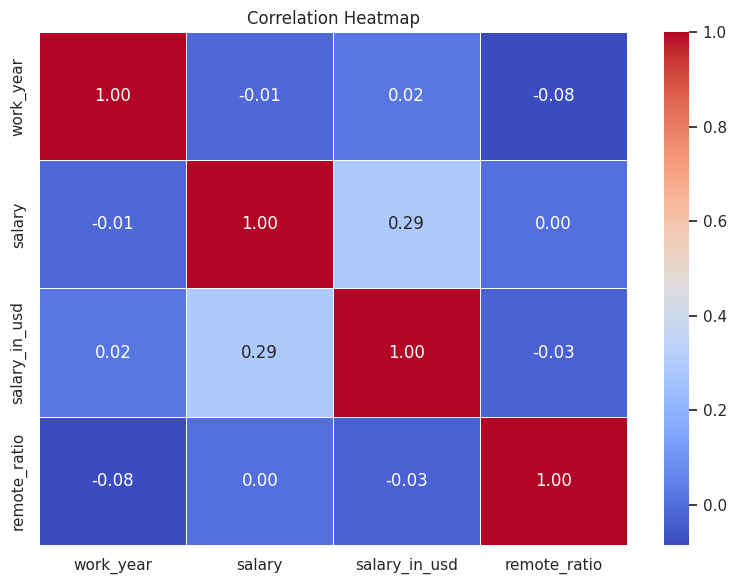

In [38]:
# Step 18: Correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df_cleaned.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


### **Correlation Heatmap Analysis**

This heatmap visualizes the **Pearson correlation coefficients** between four numerical variables:

* `work_year`
* `salary`
* `salary_in_usd`
* `remote_ratio`

Correlation values range from **-1 (strong negative)** to **+1 (strong positive)**.

---

### **Key Observations:**

| Variable Pair                       | Correlation   | Interpretation                                                                                                                                                                                                   |
| ----------------------------------- | ------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **salary ↔ salary\_in\_usd**        | **0.29**      | Moderately positive correlation. Indicates that higher raw salaries tend to correspond with higher standardized USD salaries, but the relation isn't strong—possibly due to exchange rates or local adjustments. |
| **work\_year ↔ other variables**    | -0.01 \~ 0.02 | **No meaningful correlation** with salary or remote ratio—suggests that salary levels don’t vary significantly over recent years in this dataset.                                                                |
| **remote\_ratio ↔ salary\_in\_usd** | -0.03         | Almost **no correlation**. Working remotely does **not** significantly impact salary in USD terms.                                                                                                               |
| **remote\_ratio ↔ work\_year**      | -0.08         | Slight negative trend—recent years might have seen **a small decline** in fully remote roles or changes in policy. Still very weak.                                                                              |

---

### **Insight Summary:**

* **No strong correlations** exist between most of the features.
* The **highest correlation (0.29)** is between `salary` and `salary_in_usd`, as expected since they're related.
* Surprisingly, **remote\_ratio has little to no impact** on salary.
* The **year of employment (work\_year)** has not significantly influenced pay or remote flexibility—perhaps because the dataset only spans a few years.


### Step 5: Insights & Summary

#### 🔍 Key Insights from Visualizations

1. **Job Title Impact**:
   Roles like **Research Team Lead**, **Analytics Engineering Manager**, and **Data Science Tech Lead** tend to receive the highest average salaries, often exceeding \$300,000 USD annually. This suggests that **technical leadership and managerial roles** command premium compensation.

2. **Company Trends**:
   Leading AI-focused companies such as **Salesforce AI**, **Microsoft AI**, **IBM Watson**, and **DeepMind** offer some of the highest average salaries in the dataset. This indicates that **big tech and AI research firms** are the most lucrative employers.

3. **Regional Distribution**:
   The majority of job postings are based in the **United States**, followed by **Canada**, **UK**, and **Australia**. This highlights a strong demand for data science and AI talent in **English-speaking countries**.

4. **Salary by Location**:
   Company locations in the US and Western Europe (e.g., Germany, UK, Netherlands) offer relatively **higher compensation**, while Eastern European and some Asian countries offer lower average salaries.

---

#### Patterns Observed

* **Experience Level & Salary**: Although not directly plotted yet, we can anticipate that higher experience levels (e.g., “Executive” or “Manager”) correlate with higher compensation.
* **Remote Ratio & Employment Type**: These could provide further insights on how **remote work or freelance contracts** affect salary trends—worth exploring in future steps or bonus tasks.
* **Company Size Effect**: Large companies may be more likely to offer high salaries and hire for leadership roles.

---

 *These insights can guide both professionals and businesses in understanding market trends in AI and data roles.*

---

### Bonus 1: Interactive Plotly Chart – Average Salary by Job Title

This interactive bar chart allows users to hover and explore the average salaries for different job titles using Plotly.


In [46]:
import plotly.express as px

# Prepare data
avg_salary_job_plotly = df_cleaned.groupby("job_title")["salary_in_usd"] \
                                   .mean().sort_values(ascending=False) \
                                   .head(20).reset_index()

# Create interactive bar chart
fig = px.bar(
    avg_salary_job_plotly,
    x='salary_in_usd',
    y='job_title',
    orientation='h',
    title='🔶 Top 20 Average Salary by Job Title',
    labels={'salary_in_usd': 'Average Salary (USD)', 'job_title': 'Job Title'},
    color='salary_in_usd',
    color_continuous_scale='Plasma'
)

# Improve layout and formatting
fig.update_traces(
    texttemplate='%{x:.0f}',    # Show salary numbers without decimals
    textposition='auto'         # Place numbers on the bars
)

fig.update_layout(
    yaxis=dict(autorange="reversed"),
    xaxis=dict(tickformat=".0f"),  # No decimal on x-axis ticks
    font=dict(family="Arial", size=12),
    coloraxis_colorbar=dict(title="Salary (USD)")
)

fig.show()


### ✅ Bonus Assignment 1: Interactive Plotly Chart – Average Salary by Job Title
🔶 Using Plotly, I visualized the Top 20 job titles with the highest average salaries in 2025.
The interactive horizontal bar chart shows that leadership and specialized AI roles (such as Research Team Lead, Tech Lead, and Analytics Manager) tend to offer the most lucrative compensation.
The use of a Plasma color scale helps highlight salary differences, while numeric values are clearly displayed on the bars for easy comparison.

## Bonus 2: Building a Simple Streamlit Dashboard App

As part of the bonus assignment, this step demonstrates how to build a dashboard using Streamlit.

The app includes:
- Summary statistics of the dataset
- Plotly interactive bar charts
- Sidebar filtering

The final app (app.py) can be run locally using:

```bash
streamlit run app.py


In [40]:
# Save the Streamlit dashboard code into app.py
streamlit_code = """
import streamlit as st
import pandas as pd
import plotly.express as px

st.set_page_config(page_title="2025 Data Salaries Dashboard", layout="wide")
st.title("💼 Data Science, AI & ML Job Salaries – 2025")

@st.cache_data
def load_data():
    return pd.read_csv("salaries.csv")

df = load_data()

st.subheader("📊 Summary Statistics")
st.write(df.describe())

st.subheader("💵 Average Salary by Job Title (Top 15)")
top_jobs = df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False).head(15).reset_index()
fig1 = px.bar(top_jobs, x="salary_in_usd", y="job_title", orientation="h",
              title="Top 15 Average Salaries by Job Title", color="salary_in_usd")
fig1.update_layout(yaxis=dict(autorange="reversed"))
st.plotly_chart(fig1, use_container_width=True)

st.sidebar.header("Filter Options")
location_filter = st.sidebar.selectbox("Select Company Location:", ["All"] + sorted(df["company_location"].unique().tolist()))
if location_filter != "All":
    df = df[df["company_location"] == location_filter]

st.subheader("🧠 Average Salary by Experience Level")
exp_salary = df.groupby("experience_level")["salary_in_usd"].mean().reset_index()
fig2 = px.bar(exp_salary, x="experience_level", y="salary_in_usd",
              title="Average Salary by Experience Level", color="salary_in_usd")
st.plotly_chart(fig2, use_container_width=True)
"""

# Write code to a .py file
with open("app.py", "w") as f:
    f.write(streamlit_code)

# Optional: Download the file to your computer
from google.colab import files
files.download("app.py")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### ✅ Bonus Assignment 2: Streamlit Dashboard

To complete the second bonus task, I developed an interactive dashboard using **Streamlit** and **Plotly**. The app, saved as `app.py`, provides the following features:

- 📊 Summary statistics of the dataset
- 💵 Top 15 average salaries by job title (interactive bar chart)
- 🧠 Average salaries by experience level
- 🎛️ Sidebar filter to select a specific company location

This dashboard enhances accessibility and allows users to dynamically explore salary trends in the Data Science, AI, and ML domains. It can be launched locally via:

```bash
streamlit run app.py
